In [7]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
from matplotlib import rc
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
from datetime import datetime, timedelta
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline


sns.set_style("whitegrid")
sns.set_style("ticks")

rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})
rc('text', usetex=True)
rc("savefig", dpi=300)
rc("figure", dpi=192)

plt.rcParams['figure.figsize'] = 6, 4


pd.options.display.max_columns = 999
pd.options.display.max_rows = 400


from datetime import datetime
str(datetime.now())

import h5py



In [8]:
from extra_methods import P_rates_sediments, P_wc_rates, boundary_P_fluxes, savefig, integrated_over_depth_masses

In [9]:
Fe_20y_hdf = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_Fe_200g_2030_2050_T_only_RCP4_GFDL_1995_2070.mat', 'r')
# Fe_20y_kfeox16e6_hdf = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_Fe_20x_200g_kfeox16e6_full_scen_base_historical_20y_2015_2070.mat', 'r')

In [10]:
Fe_RCP8_IPSL = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_Fe_200g_2030_2050_T_only_RCP8_IPSL_1995_2070.mat', 'r')
Fe_RCP8_GFDL = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_Fe_200g_2030_2050_T_only_RCP8_GFDL_1995_2070.mat', 'r')
Fe_RCP85_NorESM = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_Fe_200g_2030_2050_T_only_RCP85_NorESM_1995_2070.mat', 'r')
Fe_RCP4_IPSL = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_Fe_200g_2030_2050_T_only_RCP4_IPSL_1995_2070.mat', 'r')
Fe_RCP45_NorESM = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_Fe_200g_2030_2050_T_only_RCP45_NorESM_1995_2070.mat', 'r')
Fe_RCP4_GFDL = h5py.File('/Volumes/Igor EcoHDD/Scenarios/192ts_Fe_200g_2030_2050_T_only_RCP4_GFDL_1995_2070.mat', 'r')


In [11]:
boundary_P_fluxes(Fe_20y_hdf, start=12784, end=20089)

{'DOP_inflow': 0.32488259817063975,
 'DOP_outflow': 0.2142842601849817,
 'POP_inflow': 1.3758549296777982,
 'POP_outflow': 0.21962098374562103,
 'PP_outflow': 0.010022811737490131,
 'P_outflow': 0.18859705040700153,
 'Phy_outflow': 0.03477590229337514,
 'TP_inflow': 1.7007375278484385}

In [5]:
P_rates_sediments(Fe_20y_hdf, start=12784, end=20089)

R31a: -31.633
R32a: -0.000
R33a: -0.351
R33b: 2.303
R34a: -3.971
R34b: 0.344
R35a: -0.001
Ra: 2.148
Rf: 0.040
Rc: 0.000
R3a_P: 10.641
R3b_P: 21.674
R3f_P: 0.113
R3c_P: 0.000
R4a_P: 0.000
R4b_P: 0.000
R4f_P: 0.000
R4c_P: 0.000
sum: 1.308


In [6]:
integrated_over_depth_masses(Fe_20y_hdf, start=12784, end=20089)

({'C': 0.028784755724532957,
  'Chl': 0.06578695937158827,
  'DOP': 1.2466308065829144,
  'P': 1.5008975798069795,
  'POP': 1.8011194221647646,
  'PP': 0.11513857585276394},
 {'Ca3PO42': 303.4393853924924,
  'Fe3PO42': 616.2516961406169,
  'PO4': 0.2850367532768806,
  'PO4adsa': 189.05539077492972,
  'PO4adsb': 0.0015154163836162981,
  'PO4adsc': 1080.6004435870068,
  'POP': 885.0036074929761})

In [7]:
P_wc_rates(Fe_20y_hdf, start=12784, end=20089)

Re: 0.546
Rc: 0.453
Growth_bioz: -1.768
Loss_bioz: 4.357
R31a: -0.653
R32a: -0.000
R33a: -0.000
R34a: -0.000
sum: 2.934


In [12]:
start=12784
end=20089

In [13]:
fx_convert =  365 * 10**2

In [14]:
fx_convert/31000*(np.mean(np.array(Fe_20y_hdf['Sediment_results']['basin1']['sediment_transport_fluxes']['POP'][start:end,:])) + np.mean(np.array(Fe_20y_hdf['Sediment_results']['basin1']['sediment_transport_fluxes']['Chl'][start:end,:])) )

-1.6570270961157294

In [15]:
fx_convert/32000*(np.mean(np.array(Fe_20y_hdf['Sediment_results']['basin1']['sediment_transport_fluxes']['O2'][start:end,:])))

-585.3042875850861

In [17]:
days = len(np.array(Fe_RCP45_NorESM['MyLake_results']['basin1']['concentrations']['C'])[:,8])
# days_kfeox = len(np.array(Fe_20y_kfeox16e6_hdf['MyLake_results']['basin1']['concentrations']['C'])[:,8])

In [18]:
date = datetime(1995, 1, 1)
ds = pd.date_range(date, date + timedelta(days-1), freq='D')

In [19]:
days = len(np.array(Fe_RCP8_IPSL['MyLake_results']['basin1']['concentrations']['C'])[:,8])
date_2 = datetime(1995, 1, 1)
ds_2 = pd.date_range(date_2, date_2 + timedelta(days-1), freq='D')

In [20]:
names_scen = ['IPSL 8.5', 'IPSL 4.5', 'GFDL 8.5', 'GFDL 4.5', 'NorESM 8.5', 'NorESM 4.5']

In [21]:
scen = [Fe_RCP8_IPSL, Fe_RCP4_IPSL, Fe_RCP8_GFDL, Fe_RCP4_GFDL, Fe_RCP85_NorESM, Fe_RCP45_NorESM]

In [22]:
DIP_fx = pd.DataFrame({'Date': ds_2})
Fe_sed = pd.DataFrame({'Date': ds_2})
PO4ads = pd.DataFrame({'Date': ds_2})
DIP_4m = pd.DataFrame({'Date': ds_2})
Phy_4m = pd.DataFrame({'Date': ds_2})
Inflw_Fe3 = pd.DataFrame({'Date': ds_2})
Kz_mean = pd.DataFrame({'Date': ds_2})

for res, n in zip(scen,names_scen):
    DIP_fx[n] = np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])
    Fe_sed[n] = np.mean(np.array(res['Sediment_results']['basin1']['concentrations']['FeOH3'][:,:100]),axis=1)/2.5/1000*100
    PO4ads[n] = np.mean(np.array(res['Sediment_results']['basin1']['concentrations']['PO4adsa'][:,:100]),axis=1)/2.5/1000*100 + np.mean(np.array(res['Sediment_results']['basin1']['concentrations']['PO4adsb'][:,:100]),axis=1)/2.5/1000*100
    DIP_4m[n] = np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['P'][:,:]),axis=1)
    Phy_4m[n] = np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['Chl'][:,:13]),axis=1) + np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['C'][:,:13]),axis=1)
    Inflw_Fe3[n] = np.array(res['MyLake_results']['basin1']['params']['I_scFe3'][0])*np.array(res['MyLake_results']['basin1']['Inflw'][17,:])*np.array(res['MyLake_results']['basin1']['Inflw'][0,:])/ 2.38e+7    
    Kz_mean[n] = np.mean(np.array(res['MyLake_results']['basin1']['K']), axis=1)

for df in [DIP_fx, Fe_sed, PO4ads, DIP_4m, Phy_4m, Inflw_Fe3, Kz_mean]:
    df['Year'] = df.Date.dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['DOY'] = df.Date.dt.dayofyear
    df['WOY'] = df.Date.dt.weekofyear
    df['mean'] = df[names_scen].mean(axis=1)
    df['CI68'] = df[names_scen].std(axis=1)
    df['CI95'] = df[names_scen].std(axis=1)*2


In [26]:
Kz_mean[start:end].mean()

IPSL 8.5         2.002495
IPSL 4.5         2.037786
GFDL 8.5         1.852417
GFDL 4.5         1.883294
NorESM 8.5       1.848043
NorESM 4.5       1.775010
Year          2039.500342
Month            6.522930
Day             15.729637
DOY            183.125257
WOY             26.598084
mean             1.899841
CI68             0.499726
CI95             0.999453
dtype: float64

In [23]:
Fe_RCP8_IPSL.close()
Fe_RCP8_GFDL.close()
Fe_RCP85_NorESM.close()
Fe_RCP4_IPSL.close()
Fe_RCP45_NorESM.close()
Fe_RCP4_GFDL.close()



In [44]:
Fe_pd = pd.DataFrame({'Date': ds})
Fe_pd['DIP fx'] = np.array(Fe_20y_hdf['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(Fe_20y_hdf['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])
Fe_pd['Fe(III) sed'] = np.mean(np.array(Fe_20y_hdf['Sediment_results']['basin1']['concentrations']['FeOH3'][:,:100]),axis=1)/2.5/1000*100
Fe_pd['PO4ads'] = np.mean(np.array(Fe_20y_hdf['Sediment_results']['basin1']['concentrations']['PO4adsa'][:,:100]),axis=1)/2.5/1000*100 + np.mean(np.array(Fe_20y_hdf['Sediment_results']['basin1']['concentrations']['PO4adsb'][:,:100]),axis=1)/2.5/1000*100
Fe_pd['DIP 4m'] = np.mean(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['P'][:,:]),axis=1)
Fe_pd['Phy'] = np.mean(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['Chl'][:,:13]),axis=1) + np.mean(np.array(Fe_20y_hdf['MyLake_results']['basin1']['concentrations']['C'][:,:13]),axis=1)
Fe_pd['Inflw Fe(III)'] = np.array(Fe_20y_hdf['MyLake_results']['basin1']['params']['I_scFe3'][0])*np.array(Fe_20y_hdf['MyLake_results']['basin1']['Inflw'][17,:])*np.array(Fe_20y_hdf['MyLake_results']['basin1']['Inflw'][0,:])/ 2.38e+7
Fe_pd['Year'] = Fe_pd.Date.dt.year
Fe_pd['Month'] = Fe_pd.Date.dt.month
Fe_pd['Day'] = Fe_pd.Date.dt.day
Fe_pd['DOY'] = Fe_pd.Date.dt.dayofyear
Fe_pd['WOY'] = Fe_pd.Date.dt.weekofyear

In [16]:
date = datetime(2015-55, 1, 1)
ds = pd.date_range(date, date + timedelta(days_kfeox-1), freq='D')

In [17]:
Fe_kfeox_pd = pd.DataFrame({'Date': ds})
Fe_kfeox_pd['DIP fx'] = np.array(Fe_20y_kfeox16e6_hdf['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(Fe_20y_kfeox16e6_hdf['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4'])
Fe_kfeox_pd['Fe(III) sed'] = np.mean(np.array(Fe_20y_kfeox16e6_hdf['Sediment_results']['basin1']['concentrations']['FeOH3'][:,:100]),axis=1)/2.5/1000*100
Fe_kfeox_pd['DIP 4m'] = np.mean(np.array(Fe_20y_kfeox16e6_hdf['MyLake_results']['basin1']['concentrations']['P'][:,:]),axis=1)
Fe_kfeox_pd['Phy'] = np.mean(np.array(Fe_20y_kfeox16e6_hdf['MyLake_results']['basin1']['concentrations']['Chl'][:,:13]),axis=1) + np.mean(np.array(Fe_20y_kfeox16e6_hdf['MyLake_results']['basin1']['concentrations']['C'][:,:13]),axis=1)
Fe_kfeox_pd['Inflw Fe(III)'] = np.array(Fe_20y_kfeox16e6_hdf['MyLake_results']['basin1']['params']['I_scFe3'][0])*np.array(Fe_20y_kfeox16e6_hdf['MyLake_results']['basin1']['Inflw'][17,:])*np.array(Fe_20y_kfeox16e6_hdf['MyLake_results']['basin1']['Inflw'][0,:])/ 2.38e+7
Fe_kfeox_pd['Year'] = Fe_kfeox_pd.Date.dt.year
Fe_kfeox_pd['Month'] = Fe_kfeox_pd.Date.dt.month
Fe_kfeox_pd['Day'] = Fe_kfeox_pd.Date.dt.day
Fe_kfeox_pd['DOY'] = Fe_kfeox_pd.Date.dt.dayofyear
Fe_kfeox_pd['WOY'] = Fe_kfeox_pd.Date.dt.weekofyear

In [121]:
Fe_20y_hdf.close()
Fe_20y_kfeox16e6_hdf.close()

ValueError: Not a file id (Not a file id)

In [119]:
Fe_kfeox.close()

NameError: name 'Fe_kfeox' is not defined

In [5]:
sns.load_dataset("gammas")

,timepoint,ROI,subject,BOLD signal
0,0.00000,IPS,0,0.513433
1,0.00000,IPS,1,-0.414368
2,0.00000,IPS,2,0.214695
3,0.00000,IPS,3,0.814809
4,0.00000,IPS,4,-0.894992
5,0.00000,IPS,5,-0.073709
6,0.00000,IPS,6,3.542734
7,0.00000,IPS,7,0.080169
8,0.00000,IPS,8,1.547083
9,0.00000,IPS,9,2.827153


Text(0,0.5,'Fe(III) loads, [$mg\\cdot m^{-2} \\cdot d^{-1}$]')

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


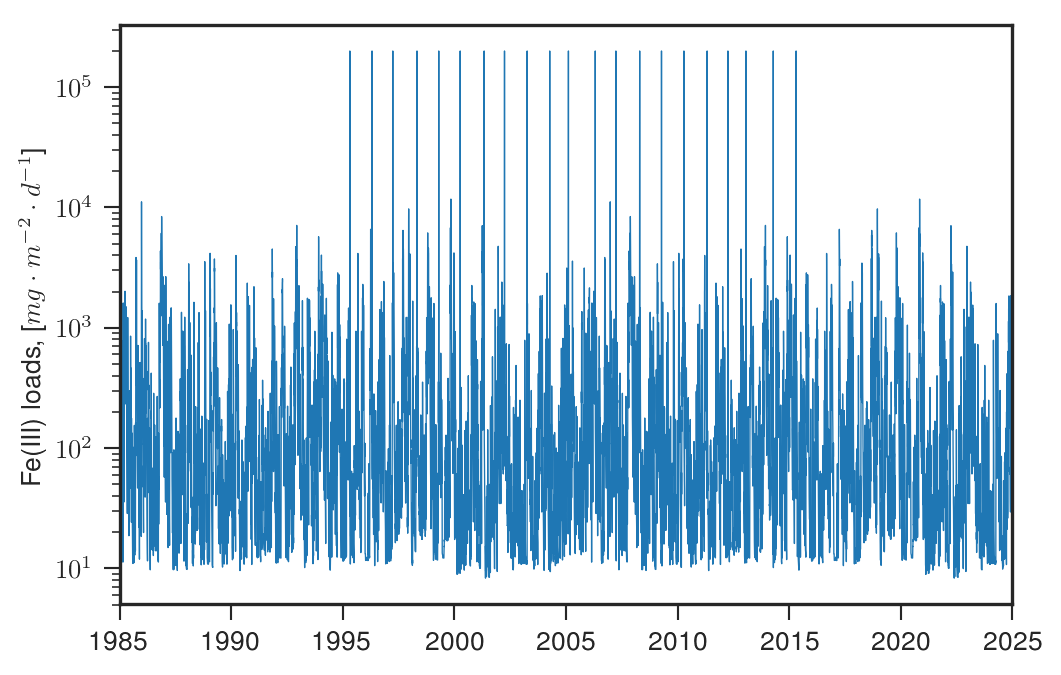

In [18]:
# Fe_pd.plot(x='Date', y='Inflw Fe(III)')
plt.semilogy(Fe_pd.Date.values, Fe_pd['Inflw Fe(III)'].values, lw=0.5)

plt.xticks([datetime(int(x), 1, 1) for x in np.linspace(1980, 2035, 12)])
plt.xlim([datetime(1985, 1, 1), datetime(2025, 1, 1)])
plt.ylabel('Fe(III) loads, [$mg\cdot m^{-2} \cdot d^{-1}$]')
# plt.xticks(np.linspace(1985, 2025, 9))

In [19]:
2047+53

2100

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


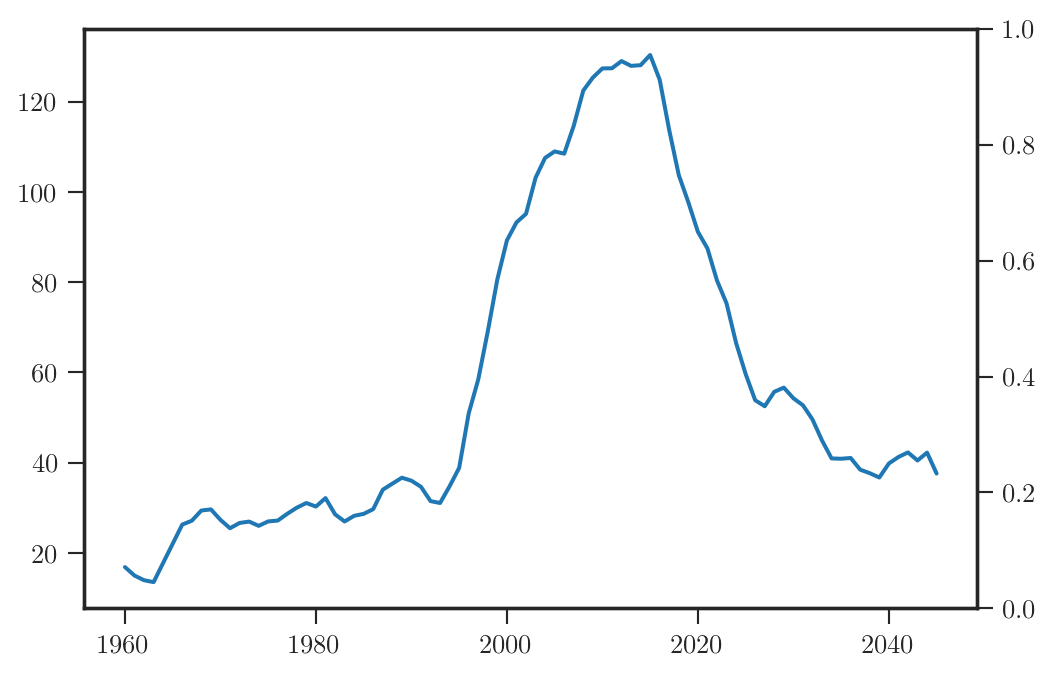

In [20]:
fig, (ax1) = plt.subplots(1,1, figsize=(6,4))
ax1.plot(Fe_pd['Year'].unique(), Fe_pd.groupby(['Year']).mean()['Fe(III) sed'])
ax2 = ax1.twinx()

In [13]:
fx_convert =  365 * 10**2

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


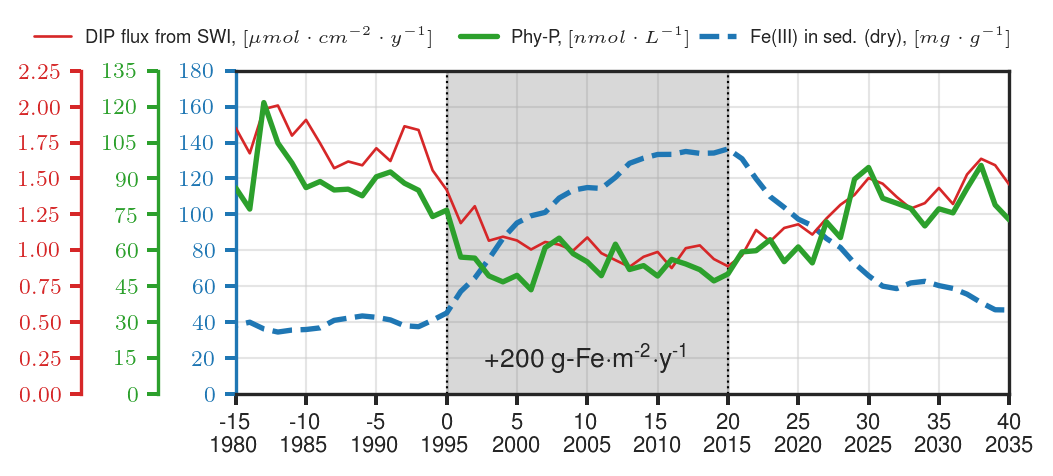

In [188]:
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, (host) = plt.subplots(1,1, figsize=(6,3))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)

p1, = host.plot(Fe_pd['Year'].unique(), Fe_pd.groupby(['Year']).mean()['Fe(III) sed'] + Fe_pd.groupby(['Year']).mean()['PO4ads'], c=sns.color_palette()[0], label="Fe(III) in sed. (dry), $[mg\cdot g^{-1}]$",ls='--', lw=2)
p2, = par1.plot(Fe_pd['Year'].unique(), fx_convert/31000*Fe_pd.groupby(['Year']).mean()['DIP fx'], c=sns.color_palette()[3], label="DIP flux from SWI, $[\mu mol \cdot cm^{-2}\cdot y^{-1}]$", lw=1)
p3, = par2.plot(Fe_pd['Year'].unique(), Fe_pd.groupby(['Year']).mean()['Phy']/31*1000, c=sns.color_palette()[2], label="Phy-P, $[nmol\cdot L^{-1}]$", lw=2)



# host.set_xlabel("Year")
# host.set_ylabel("Fe(III) sed")
# par1.set_ylabel("DIP fx")
# par2.set_ylabel("Phy")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), labelsize='small', **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), labelsize='small', **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), labelsize='small', **tkw)
host.tick_params(axis='x', **tkw)

par1.spines["left"].set_position(("axes", -0.2)) # red one
par2.spines["left"].set_position(("axes", -0.1)) # green one
host.spines["left"].set_color(p1.get_color()) # green one
par1.spines["left"].set_color(p2.get_color()) # green one
par2.spines["left"].set_color(p3.get_color()) # green one

make_patch_spines_invisible(par1)
make_patch_spines_invisible(par2)

par1.spines["left"].set_visible(True)
par1.yaxis.set_label_position('left')
par1.yaxis.set_ticks_position('left')

par2.spines["left"].set_visible(True)
par2.yaxis.set_label_position('left')
par2.yaxis.set_ticks_position('left')

lines = [p1, p2, p3]

# host.legend(lines, [l.get_label() for l in lines], loc=2, frameon=1, fontsize='xx-small')
host.grid(alpha=0.5)

host.vlines([1995,2015], 0, 200, linestyle=':', lw=.8)
host.axvspan(1995, 2015, alpha=0.3, color='gray')

# legend1 = pyplot.legend(, ["algo1", "algo2", "algo3"], loc=1)
shiftx = 0.1
host.legend([lines[0]], [lines[0].get_label()], loc=(0.49+shiftx,1.05), frameon=0, fontsize='x-small')
par1.legend([lines[1]], [lines[1].get_label()], loc=(-0.37+shiftx,1.05), frameon=0, fontsize='x-small')
par2.legend([lines[2]], [lines[2].get_label()], loc=(0.18+shiftx,1.05), frameon=0, fontsize='x-small')
# par1.add_artist(l2)
# plt.tight_layout()
# host.text(2005,158, 'Fe addition', fontsize='small', horizontalalignment='center')
host.text(2005,15, r'+200 g-Fe$\cdot$m\textsuperscript{-2}$\cdot$y\textsuperscript{-1}', fontsize='medium', horizontalalignment='center')


plt.subplots_adjust(left=0.2, bottom=0.15, right=None, top=None,
                wspace=None, hspace=None)

# host.margins(x=1, y=1)
# plt.gcf().subplots_adjust(bottom=0.15)
# plt.gcf().subplots_adjust(right=0.3)

host.set_xticks(np.linspace(1980,2040,13))
host.set_xticklabels(['-15\n1980','-10\n1985','-5\n1990','0\n1995','5\n2000','10\n2005','15\n2010','20\n2015','25\n2020','30\n2025', '35\n2030', '40\n2035'], fontsize='small')

# host.set_xlim(1985, 2030)
plt.tight_layout(pad=2.5)

host.set_xlim(1980, 2035)
host.set_ylim(0, 180)
par1.set_ylim(0., 2.25)
par2.set_ylim(0, 135)
host.set_yticks(np.linspace(0,180,10))
par1.set_yticks(np.linspace(0,2.25,10))
par2.set_yticks(np.linspace(0,135,10))

# savefig('cc/Fe/Fe_Phy_Pfx_4')


plt.show()

In [46]:
res=Fe_20y_hdf

date = datetime(1995, 1, 1)
days = len(np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:,8])
ds = pd.date_range(date, date + timedelta(days-1), freq='D')



Loadings = pd.DataFrame({'Date': ds})


inflow_q = np.array(res['MyLake_results']['basin1']['Inflw'][0, :])
inflow_TP = np.array(res['MyLake_results']['basin1']['Inflw'][4, :])
inflow_Fe = np.array(res['MyLake_results']['basin1']['Inflw'][17, :])
area = 2.38e+7

Loadings['TP inflow'] = inflow_q * inflow_TP / 31 * 1000 / area * 365 / 1e4
Loadings['Fe inflow'] = inflow_q * inflow_Fe * np.array(res['MyLake_results']['basin1']['params']['I_scFe3'][0])
Loadings['P fx'] = (np.array(res['Sediment_results']['basin1']['sediment_transport_fluxes']['PO4']) + np.array(res['Sediment_results']['basin1']['Bioirrigation_fx_zt']['PO4']))
Loadings['Phy'] = np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['C'])[:,:10],axis=1) + np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['Chl'])[:,:10], axis=1)
Loadings['PO4'] = np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['P'])[:,:10],axis=1)
Loadings['POP'] = np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['POP'])[:,:10],axis=1)
Loadings['DOP'] = np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['DOP'])[:,:10],axis=1)
Loadings['PP'] = np.mean(np.array(res['MyLake_results']['basin1']['concentrations']['PP'])[:,:10],axis=1)
Loadings['T'] = np.mean(np.array(res['MyLake_results']['basin1']['T'])[:,:10],axis=1)
    
Loadings['Year'] = Loadings.Date.dt.year
Loadings['Month'] = Loadings.Date.dt.month
Loadings['Day'] = Loadings.Date.dt.day
Loadings['DOY'] = Loadings.Date.dt.dayofyear
Loadings['WOY'] = Loadings.Date.dt.weekofyear

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


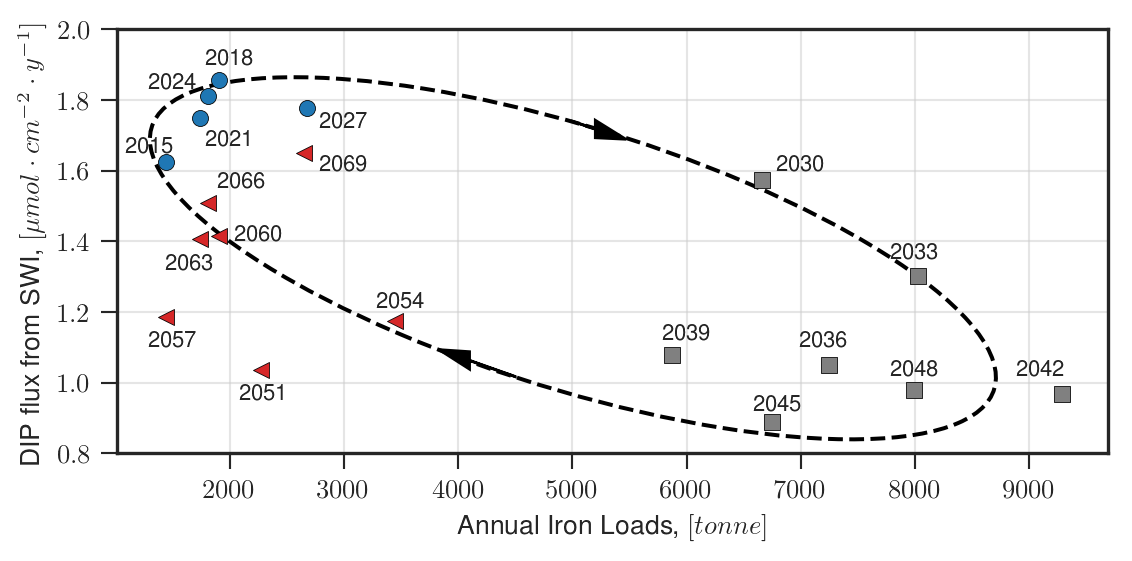

In [128]:
from matplotlib.patches import Ellipse, Circle
from adjustText import adjust_text

# matplotlib.use('GTKAgg')

mean_loading = Loadings.groupby('Year').mean()

y=mean_loading['P fx'].values[20::3]*fx_convert/31000
x=(mean_loading['Fe inflow'].values)[20::3]*1e-9*365
n=mean_loading.index.values[20::3]

fig, ax = plt.subplots(1,1, figsize=(6,3), dpi=192)
ax.scatter(x[n<2030],y[n<2030], color=sns.color_palette()[0], edgecolors='k', lw=0.3, zorder=2, ) # vmin=0, vmax=20
ax.scatter(x[(n>2029) & (n<2050)],y[(n>2029) & (n<2050)],color='gray', edgecolors='k', lw=0.3, zorder=2, marker='s') # vmin=0, vmax=20
ax.scatter(x[n>2049],y[n>2049],color=sns.color_palette()[3], edgecolors='k', lw=0.3, zorder=2, marker='<') # vmin=0, vmax=20
# ax.plot(x,y) # vmin=0, vmax=20



ax.set_ylabel('DIP flux from SWI, $[\mu mol\cdot cm^{-2}\cdot y^{-1}]$')
ax.set_xlabel('Annual Iron Loads, $[tonne]$')
# cbar = fig.colorbar(p)

# cbar.set_label(r'Years')
# ax.set_zlabel('12')
ax.grid(alpha=0.5)
plt.tight_layout()
# savefig('hysteresis_2')
# a = fig.add_subplot(111, aspect='equal')
# ax.add_artist(Ellipse((5000, 1), 1000, 10, -45))


# texts = [ax.text(x[i], y[i], txt, fontsize='xx-small') for i, txt in enumerate(n)]

# adjust_text(texts)
e = Ellipse((0.46, 0.46), 1.1, 0.5, -45,alpha=1, transform=ax.transAxes, fill=False, linestyle='--', lw=1.5, zorder=1)
# e = Ellipse((460, 310), 680, 280, -25,alpha=1, transform=ax.transAxes, fill=False, linestyle='--', lw=1.5, zorder=1)
ax.add_artist(e)

koef = 0.83
ax.arrow(5000, 1.40/koef+0.053, 200, -0.018/koef, head_width=0.05, head_length=270, fc='k', ec='k')
ax.arrow(4500, 0.844/koef, -400, 0.038/koef, head_width=0.05, head_length=270, fc='k', ec='k')


ax.text(1300,1.65, r'2015', fontsize='small', horizontalalignment='center')
ax.text(2000,1.67, r'2021', fontsize='small', horizontalalignment='center')
ax.text(1500,1.83, r'2024', fontsize='small', horizontalalignment='center')
ax.text(2000,1.9, r'2018', fontsize='small', horizontalalignment='center')
ax.text(3000,1.72, r'2027', fontsize='small', horizontalalignment='center')
ax.text(7000,1.6, r'2030', fontsize='small', horizontalalignment='center')
ax.text(8000,1.35, r'2033', fontsize='small', horizontalalignment='center')
ax.text(8000,1.02, r'2048', fontsize='small', horizontalalignment='center')
ax.text(9100,1.02, r'2042', fontsize='small', horizontalalignment='center')
ax.text(7200,1.1, r'2036', fontsize='small', horizontalalignment='center')
ax.text(6800,0.92, r'2045', fontsize='small', horizontalalignment='center')
ax.text(6000,1.12, r'2039', fontsize='small', horizontalalignment='center')
ax.text(3500,1.21, r'2054', fontsize='small', horizontalalignment='center')
ax.text(2300,0.95, r'2051', fontsize='small', horizontalalignment='center')
ax.text(1500,1.1, r'2057', fontsize='small', horizontalalignment='center')
ax.text(2250,1.4, r'2060', fontsize='small', horizontalalignment='center')
ax.text(1650,1.32, r'2063', fontsize='small', horizontalalignment='center')
ax.text(2100,1.55, r'2066', fontsize='small', horizontalalignment='center')
ax.text(3000,1.6, r'2069', fontsize='small', horizontalalignment='center')


plt.ylim(0.8,2)

# savefig('hysteresis_Fe_vs_Pfx_4')

# plt.show()

# plt.savefig('hysteresis_Fe_vs_Pfx_3.pgf', dpi=188)

In [74]:
pd.DataFrame({'y':n, 'Fe':x,'DIP':y}).to_csv('hist.csv')

In [120]:
cmocean.cm.oxy

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/imarkelo/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


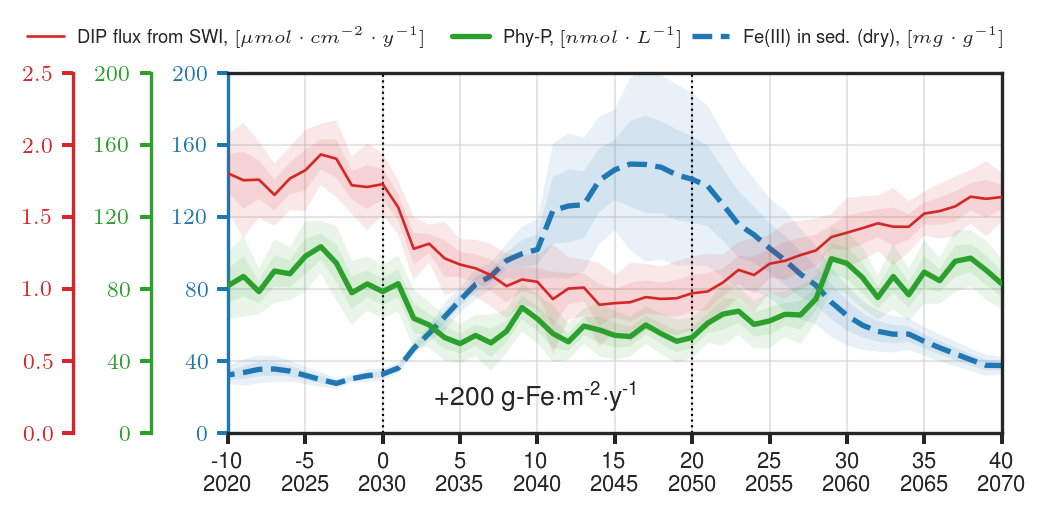

In [38]:
import matplotlib.pyplot as plt


def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)

fig, (host) = plt.subplots(1,1, figsize=(6,3.2))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

# Offset the right spine of par2.  The ticks and label have already been
# placed on the right by twinx above.
par2.spines["right"].set_position(("axes", 1.2))
# Having been created by twinx, par2 has its frame off, so the line of its
# detached spine is invisible.  First, activate the frame but make the patch
# and spines invisible.
make_patch_spines_invisible(par2)
# Second, show the right spine.
par2.spines["right"].set_visible(True)


p1, = host.plot(Fe_sed['Year'].unique()+1, Fe_sed.groupby(['Year']).mean()['mean'],c=sns.color_palette()[0], label="Fe(III) in sed. (dry), $[mg\cdot g^{-1}]$",ls='--', lw=2)
host.fill_between(Fe_sed['Year'].unique()+1, Fe_sed.groupby(['Year']).mean()['mean']-Fe_sed.groupby(['Year']).mean()['CI68'], Fe_sed.groupby(['Year']).mean()['mean']+Fe_sed.groupby(['Year']).mean()['CI68'], alpha=0.1, lw=0, color=sns.color_palette()[0])
host.fill_between(Fe_sed['Year'].unique()+1, Fe_sed.groupby(['Year']).mean()['mean']-2*Fe_sed.groupby(['Year']).mean()['CI68'], Fe_sed.groupby(['Year']).mean()['mean']+2*Fe_sed.groupby(['Year']).mean()['CI68'], alpha=0.1, lw=0, color=sns.color_palette()[0])



p2, = par1.plot(DIP_fx['Year'].unique()+1, fx_convert/31000*DIP_fx.groupby(['Year']).mean()['mean'],c=sns.color_palette()[3], label="DIP flux from SWI, $[\mu mol \cdot cm^{-2}\cdot y^{-1}]$", lw=1)
par1.fill_between(DIP_fx['Year'].unique()+1, fx_convert/31000*DIP_fx.groupby(['Year']).mean()['mean']-fx_convert/31000*DIP_fx.groupby(['Year']).mean()['CI68'], fx_convert/31000*DIP_fx.groupby(['Year']).mean()['mean']+fx_convert/31000*DIP_fx.groupby(['Year']).mean()['CI68'], alpha=0.1, lw=0, color=sns.color_palette()[3])
par1.fill_between(DIP_fx['Year'].unique()+1, fx_convert/31000*DIP_fx.groupby(['Year']).mean()['mean']-fx_convert/31000*2*DIP_fx.groupby(['Year']).mean()['CI68'], fx_convert/31000*DIP_fx.groupby(['Year']).mean()['mean']+fx_convert/31000*2*DIP_fx.groupby(['Year']).mean()['CI68'], alpha=0.1, lw=0, color=sns.color_palette()[3])

p3, = par2.plot(Phy_4m['Year'].unique()+1, Phy_4m.groupby(['Year']).mean()['mean']/31*1000,c=sns.color_palette()[2], label="Phy-P, $[nmol\cdot L^{-1}]$", lw=2)
par2.fill_between(Phy_4m['Year'].unique()+1, Phy_4m.groupby(['Year']).mean()['mean']/31*1000-Phy_4m.groupby(['Year']).mean()['CI68']/31*1000, Phy_4m.groupby(['Year']).mean()['mean']/31*1000+Phy_4m.groupby(['Year']).mean()['CI68']/31*1000, alpha=0.1, lw=0, color=sns.color_palette()[2])
par2.fill_between(Phy_4m['Year'].unique()+1, Phy_4m.groupby(['Year']).mean()['mean']/31*1000-2*Phy_4m.groupby(['Year']).mean()['CI68']/31*1000, Phy_4m.groupby(['Year']).mean()['mean']/31*1000+2*Phy_4m.groupby(['Year']).mean()['CI68']/31*1000, alpha=0.1, lw=0, color=sns.color_palette()[2])


# p1, = host.plot(Fe_sed['Year'].unique(), Fe_sed.groupby(['Year']).mean()[names_scen] + PO4ads.groupby(['Year']).mean()[names_scen], c=sns.color_palette()[0], label="Fe(III) in sed. (dry), $[mg\cdot g^{-1}]$",ls='--', lw=2)
# p2, = par1.plot(Fe_pd['Year'].unique(), fx_convert/31000*Fe_pd.groupby(['Year']).mean()['DIP fx'], c=sns.color_palette()[3], label="DIP flux from SWI, $[\mu mol \cdot cm^{-2}\cdot y^{-1}]$", lw=1)
# p3, = par2.plot(Fe_pd['Year'].unique(), Fe_pd.groupby(['Year']).mean()['Phy']/31*1000, c=sns.color_palette()[2], label="Phy-P, $[nmol\cdot L^{-1}]$", lw=2)



# host.set_xlabel("Year")
# host.set_ylabel("Fe(III) sed")
# par1.set_ylabel("DIP fx")
# par2.set_ylabel("Phy")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), labelsize='small', **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), labelsize='small', **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), labelsize='small', **tkw)
host.tick_params(axis='x', **tkw)

par1.spines["left"].set_position(("axes", -0.2)) # red one
par2.spines["left"].set_position(("axes", -0.1)) # green one
host.spines["left"].set_color(p1.get_color()) # green one
par1.spines["left"].set_color(p2.get_color()) # green one
par2.spines["left"].set_color(p3.get_color()) # green one

make_patch_spines_invisible(par1)
make_patch_spines_invisible(par2)

par1.spines["left"].set_visible(True)
par1.yaxis.set_label_position('left')
par1.yaxis.set_ticks_position('left')

par2.spines["left"].set_visible(True)
par2.yaxis.set_label_position('left')
par2.yaxis.set_ticks_position('left')

lines = [p1, p2, p3]

# host.legend(lines, [l.get_label() for l in lines], loc=2, frameon=1, fontsize='xx-small')
host.grid(alpha=0.5)

host.vlines([2030,2050], 0, 200, linestyle=':', lw=.8)
# host.axvspan(2030, 2050, alpha=0.1, color='gray')

# legend1 = pyplot.legend(, ["algo1", "algo2", "algo3"], loc=1)
shiftx = 0.1
host.legend([lines[0]], [lines[0].get_label()], loc=(0.49+shiftx,1.05), frameon=0, fontsize='x-small')
par1.legend([lines[1]], [lines[1].get_label()], loc=(-0.37+shiftx,1.05), frameon=0, fontsize='x-small')
par2.legend([lines[2]], [lines[2].get_label()], loc=(0.18+shiftx,1.05), frameon=0, fontsize='x-small')
# par1.add_artist(l2)
# plt.tight_layout()
# host.text(2005,158, 'Fe addition', fontsize='small', horizontalalignment='center')
host.text(2040,15, r'+200 g-Fe$\cdot$m\textsuperscript{-2}$\cdot$y\textsuperscript{-1}', fontsize='medium', horizontalalignment='center')


plt.subplots_adjust(left=0.2, bottom=0.15, right=None, top=None,
                wspace=None, hspace=None)

# host.margins(x=1, y=1)
# plt.gcf().subplots_adjust(bottom=0.15)
# plt.gcf().subplots_adjust(right=0.3)

host.set_xticks(np.linspace(2020,2070,11))
host.set_xticklabels(['-10\n2020','-5\n2025','0\n2030','5\n2035','10\n2040','15\n2045','20\n2050','25\n2055','30\n2060', '35\n2065', '40\n2070'], fontsize='small')

host.set_xlim(2020, 2070)
plt.tight_layout(pad=2.5)

host.set_xlim(2020, 2070)
host.set_ylim(0, 180)
par1.set_ylim(0., 2.25)
par2.set_ylim(0, 135)
host.set_yticks(np.linspace(0,200,6))
par1.set_yticks(np.linspace(0,2.5,6))
par2.set_yticks(np.linspace(0,200,6))

# savefig('cc/Fe/Fe_Phy_Pfx_climate_uncert')


plt.show()